# Business Problem

The online reservation channels have dramatically changed booking possibilities and customer's behaviour. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, schedduling conflicts, etc., This is often made easier by option to do so free of charge or preferably at low cost which is beneficial to hotel guests but it is less desirable and possibly revenue- diminishing factor for hotels to deal with.

**Can you predict if the customer is going to honor the reservation or cancel it?**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
# Importing the Dataset

df = pd.read_csv(r'Hotel.csv')
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


**Data Understanding**

- **Booking_ID :** Unique Identifier of each Booking.
- **no_of_adults :** Number of Adults.
- **no_of_children :** Number of children.
- **no_of_weekend_nights :** Number of Weekend Nights (Saturday and Sunday) the guest stayed or booked to stay at the Hotel.
- **no_of_week_nights :** Number of Week Nights (Monday to Friday) the guest stayed or booked to stay at the Hotel.
- **type_of_meal_plan :** Type of Meal Plan Booked by the Customer.
- **required_car_parking_space :** Does the customer require a car parking? (0 - No, 1 - Yes)
- **room_type_reserved :** Type of room reserved by the customer. The values are encoded.
- **lead_time :** Number of Days between Booking date and Arrival date.
- **arrival_year :** Year of Arrival date.
- **arrival_month :** Month of Arrival date.
- **arrival_date :** Date of Arrival date.
- **market_segment_type :** Market Segment Designation.
- **repeated_guest :** Is the customer a repeated guest? (0 - No, 1 - Yes)
- **no_of_previous_cancellations :** Number of Previously bookings that were cancelled by the customer prior to the current booking.
- **no_of_previous_bookings_not_cancelled :** No of Previous bookings that were not cancelled by the customer prior to the current booking.
- **avg_price_per_room :** Average price per day of the reservation; prices of the rooms are dynamic(in euros)
- **no_of_special_requests :** Total number of special requests made by the customer (e.g., high floor, view from the room etc.,)
- **booking_status :** Flag indication if the booking was canceled or not.

In [3]:
# Shape of the Dataset

df.shape

(36275, 19)

In [4]:
# Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

**Data Preprocessing**

In [5]:
# Unique values of all variables

df['Booking_ID'].nunique()

36275

- Each of the value is unique. we can drop this variable.

In [6]:
df['type_of_meal_plan'].nunique()

4

In [7]:
df['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [8]:
df['type_of_meal_plan'].value_counts()

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64

In [9]:
df['room_type_reserved'].nunique()

7

In [10]:
df['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [11]:
df['room_type_reserved'].value_counts()

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

In [12]:
df['market_segment_type'].nunique()

5

In [13]:
df['market_segment_type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [14]:
df['market_segment_type'].value_counts()

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [15]:
df['booking_status'].nunique()

2

In [16]:
df['booking_status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [17]:
df['booking_status'].value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

In [18]:
df['booking_status'] = df['booking_status'].replace({'Canceled':0,'Not_Canceled':1})

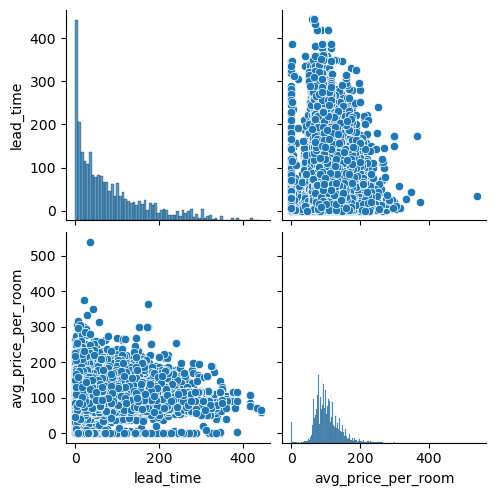

In [19]:
# Seperating the continuous variables.

continuous = ['lead_time','avg_price_per_room']

sns.pairplot(df[continuous])

In [20]:
df[continuous].describe()

,lead_time,avg_price_per_room
count,36275.000000,36275.000000
mean,85.232557,103.423539
std,85.930817,35.089424
min,0.000000,0.000000
25%,17.000000,80.300000
50%,57.000000,99.450000
75%,126.000000,120.000000
max,443.000000,540.000000


- We observe that the minimum avg_price_per_room is 0.
- In General the price of the room should have a value.
- so we have to drop those columns.

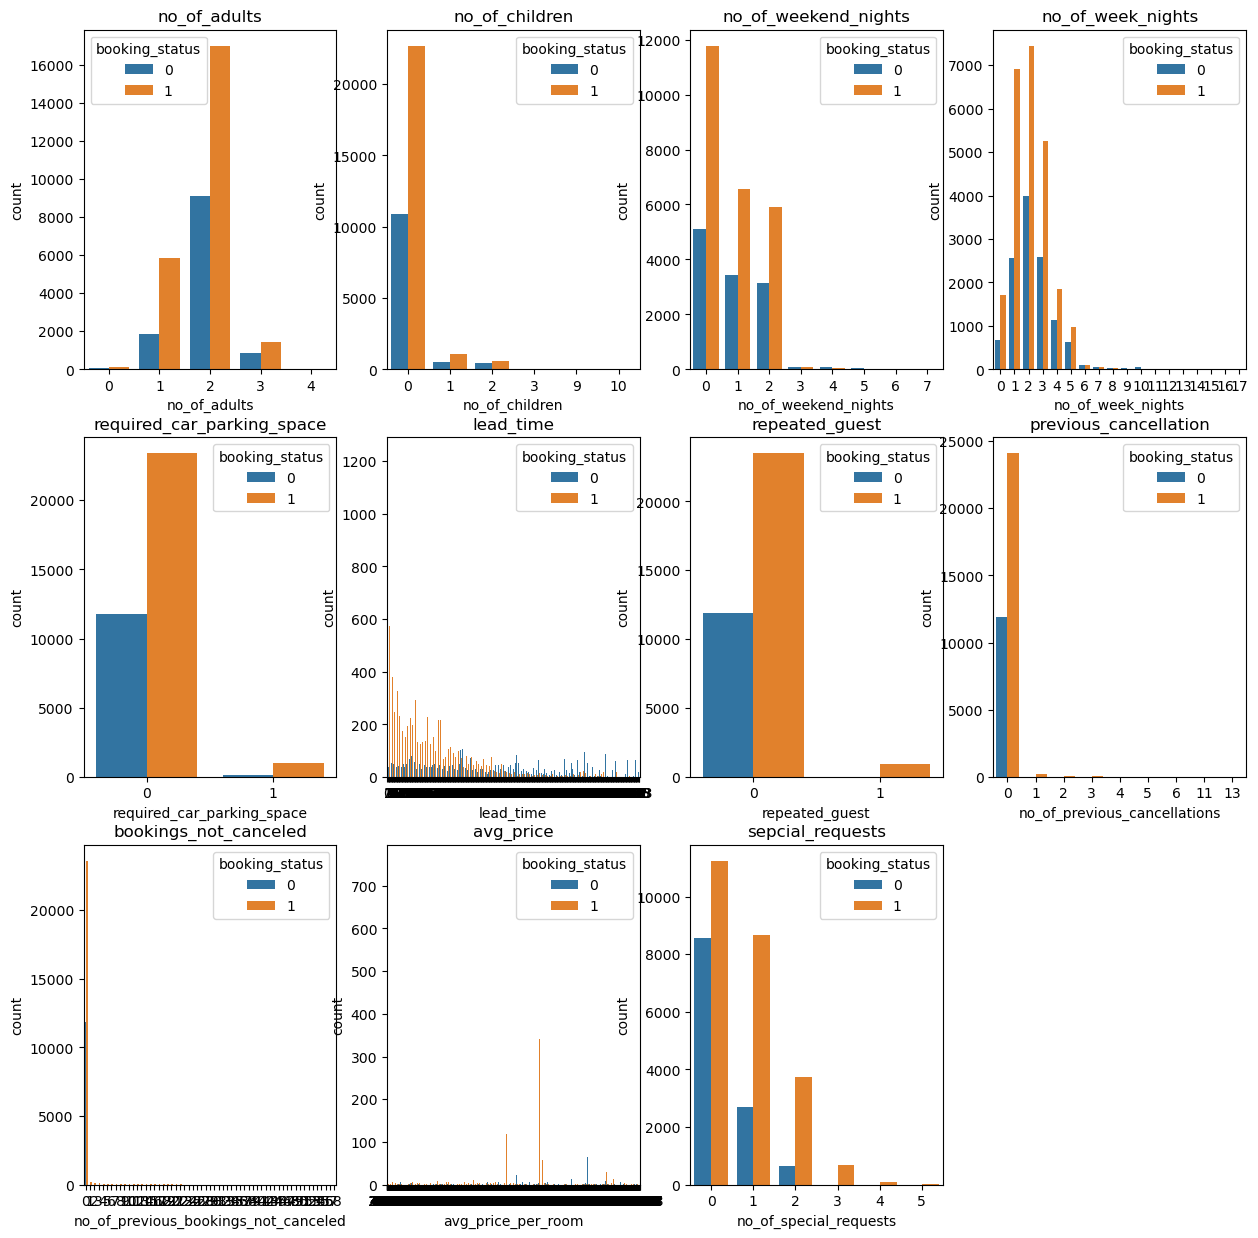

In [21]:
# Visualizing the numeric data

plt.figure(figsize=(15,15))

plt.subplot(3,4,1)
sns.countplot(x = df['no_of_adults'],hue=df['booking_status'])
plt.title('no_of_adults')

plt.subplot(3,4,2)
sns.countplot(x=df['no_of_children'],hue=df['booking_status'])
plt.title('no_of_children')

plt.subplot(3,4,3)
sns.countplot(x=df['no_of_weekend_nights'],hue=df['booking_status'])
plt.title('no_of_weekend_nights')

plt.subplot(3,4,4)
sns.countplot(x=df['no_of_week_nights'],hue=df['booking_status'])
plt.title('no_of_week_nights')

plt.subplot(3,4,5)
sns.countplot(x=df['required_car_parking_space'],hue=df['booking_status'])
plt.title('required_car_parking_space')

plt.subplot(3,4,6)
sns.countplot(x=df['lead_time'],hue=df['booking_status'])
plt.title('lead_time')

plt.subplot(3,4,7)
sns.countplot(x=df['repeated_guest'],hue=df['booking_status'])
plt.title('repeated_guest')

plt.subplot(3,4,8)
sns.countplot(x=df['no_of_previous_cancellations'],hue=df['booking_status'])
plt.title('previous_cancellation')

plt.subplot(3,4,9)
sns.countplot(x=df['no_of_previous_bookings_not_canceled'],hue=df['booking_status'])
plt.title('bookings_not_canceled')

plt.subplot(3,4,10)
sns.countplot(x=df['avg_price_per_room'],hue=df['booking_status'])
plt.title('avg_price')

plt.subplot(3,4,11)
sns.countplot(x=df['no_of_special_requests'],hue=df['booking_status'])
plt.title('sepcial_requests')

plt.show()

**Observations from above plots**

- **no_of_adults :** Maximum no of adult pairs is 2 and more cancellations are also done by them. There are records where adults are 0 but still cancellations are present.
- **no_of_children :** Maximum bookings are with no children. Most of the bookings cancelled are associated with no children.
- **no_of_weekend_nights :** Number of no weekend nights are showing maximum cancellations.
- **no_of_week_nights :** Most of the bookings of week nights count 2 are getting cancelled.
- **required_car_parking_space :** Most of the bookings required car parking space and many of those bookinngs got canceled.
- **lead_time :** Lead time is showing the great impact. As the time increases the number of cancellations are also increasing. The more the lead time more the chance of getting cancelled.
- **repeated_guests :** Majority of the people are repeated customers. Their cancellations are also high.
- **special_requests :** Bookings with no special requests are getting canceled more.

In [22]:
# checking the null values

df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

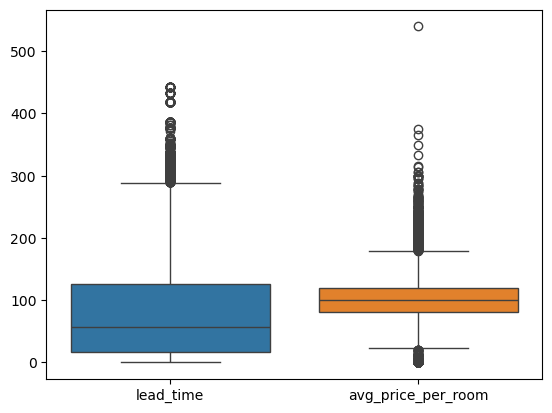

In [23]:
# Checking the Outliers

sns.boxplot(df[continuous])
plt.show()

- Lead time is having the outliers. We have to remove or retrain or replace.
- Average Price is having outliers. We have to remove or retrain or replace. 

In [24]:
# Checking the Skewness

df[continuous].skew()

lead_time             1.292492
avg_price_per_room    0.667133
dtype: float64

**Data Cleaning**

In [25]:
# drop the recors where no_of_adults=0
# drop the records where average_price_room <1

df = df[~(df['no_of_adults']==0)]
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,1
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,1
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,1
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,0
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,1
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,0


In [26]:
# checking the duplicate records

df.duplicated().sum()

0

In [27]:
# drop unimportant variables

df = df.drop(columns=['Booking_ID','arrival_year','arrival_month','arrival_date'])

In [28]:
from scipy.stats import boxcox

df['lead_time'],a = boxcox(df.lead_time+0.01)
df['avg_price_per_room'],b = boxcox(df.avg_price_per_room+0.01)

In [29]:
df[continuous].skew()

lead_time            -0.193055
avg_price_per_room    0.059195
dtype: float64

In [30]:
# Create a dummy dataset

df = pd.get_dummies(df,drop_first=True,dtype='int')
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,14.418538,0,0,0,33.605823,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,2.104355,0,0,0,50.460283,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,0.009966,0,0,0,31.453971,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,14.088030,0,0,0,47.865589,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,7.620749,0,0,0,45.702642,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,9.764145,0,0,0,72.912017,...,0,0,1,0,0,0,0,0,0,1
36271,2,0,1,3,0,14.517592,0,0,0,44.292955,...,0,0,0,0,0,0,0,0,0,1
36272,2,0,2,6,0,12.251525,0,0,0,47.235006,...,0,0,0,0,0,0,0,0,0,1
36273,2,0,0,3,0,8.592276,0,0,0,45.702642,...,0,0,0,0,0,0,0,0,0,1


In [36]:
train = []
cv = []

X = df.drop(columns=['booking_status'])
y = df['booking_status']

for i in range(1,100):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=i,train_size=0.8)
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    ypred_train = lr.predict(x_train)
    from sklearn.metrics import accuracy_score
    train.append(accuracy_score(y_train,ypred_train))
    from sklearn.model_selection import cross_val_score
    cv.append(cross_val_score(lr,x_train,y_train,cv=5,scoring='accuracy').mean())

em = pd.DataFrame({'Train':train,'cv':cv})
gm = em[(abs(em['Train']-em['cv'])<=0.05)]
rs = gm[gm['cv']==gm['cv'].max()].index.tolist()[0]
print('best random state number is :',rs)

best random state number is : 17


In [ ]:
df.to_csv('clean.csv',index=False)